In [1]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
m = n = l = 4 # L of square grid

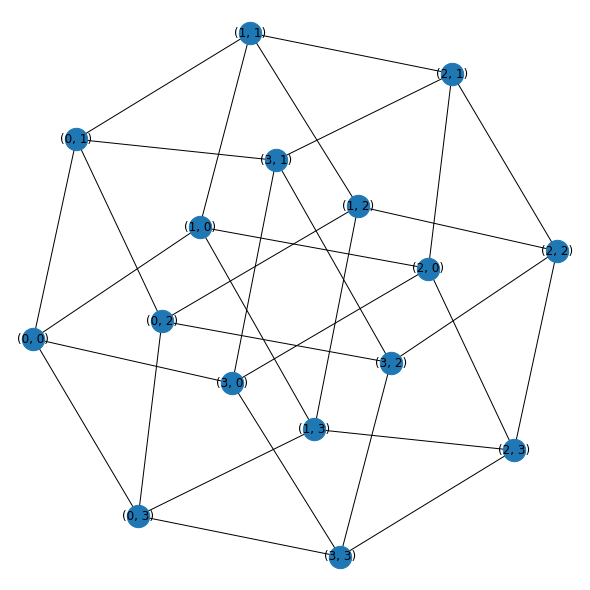

In [48]:
import imp 

import graph_gen
imp.reload(graph_gen)

periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [49]:
tree = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -2e-06 M: 1.74e-18 S: 0.693
beta: 0.1, Fe: -7.033 Energy: -0.206 M: 5.39e-18 S: 0.683+022
beta: 0.2, Fe: -3.679 Energy: -0.456 M: -8.78e-19 S: 0.644
beta: 0.3, Fe: -2.664 Energy: -0.844 M: 4.59e-17 S: 0.546
beta: 0.4, Fe: -2.275 Energy: -1.38 M: 2.76e-17 S: 0.3588
beta: 0.5, Fe: -2.138 Energy: -1.76 M: 0.0 S: 0.191-33.19
beta: 0.6, Fe: -2.089 Energy: -1.91 M: 0.0 S: 0.109-32.43
beta: 0.7, Fe: -2.068 Energy: -1.96 M: 0.0 S: 0.073132.11
beta: 0.8, Fe: -2.056 Energy: -1.98 M: 0.0 S: 0.057332.10
beta: 0.9, Fe: -2.049 Energy: -1.99 M: 0.0 S: 0.05 -32.00
beta: 1.0, Fe: -2.044 Energy: -2.0 M: 0.0 S: 0.0465-32.00
beta: 1.1, Fe: -2.040 Energy: -2.0 M: -5.36e-14 S: 0.0449
beta: 1.2, Fe: -2.036 Energy: -2.0 M: 0.0 S: 0.0441-32.00
beta: 1.3, Fe: -2.033 Energy: -2.0 M: 0.0 S: 0.0437-32.00
beta: 1.4, Fe: -2.031 Energy: -2.0 M: 0.0 S: 0.0435-32.00
beta: 1.5, Fe: -2.029 Energy: -2.0 M: 0.0 S: 0.0434-32.00
beta: 1.6, Fe: -2.027 Energy: -2.0 M: 0.0 S: 0.0434-32.00
beta

In [50]:
res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.184 std_fe: 4.55E-02 M: 0.006 S: 0.693 E: -0.001 -0.003635555
fe: -7.032 std_fe: 3.21E-02 M: -0.000 S: 0.683 E: -0.203-0.002525
fe: -3.671 std_fe: 6.66E-02 M: 0.003 S: 0.649 E: -0.424 0.0022555
fe: -2.634 std_fe: 1.08E-01 M: -0.011 S: 0.569 E: -0.736-0.006635
fe: -2.235 std_fe: 8.83E-02 M: 0.005 S: 0.331 E: -1.408 -0.021675
fe: -2.122 std_fe: 3.94E-02 M: 0.004 S: 0.152 E: -1.818 -0.019555
fe: -2.083 std_fe: 1.84E-02 M: 0.007 S: 0.086 E: -1.940 -0.01272
fe: -2.066 std_fe: 9.39E-03 M: -0.000 S: 0.064 E: -1.9740.0375925
fe: -2.056 std_fe: 6.10E-03 M: -0.001 S: 0.052 E: -1.991-0.005385
fe: -2.049 std_fe: 4.97E-03 M: -0.001 S: 0.048 E: -1.9950.0025135
fe: -2.044 std_fe: 2.11E-03 M: 0.011 S: 0.046 E: -1.9980.013045
fe: -2.039 std_fe: 5.22E-03 M: 0.016 S: 0.045 E: -1.9990.003883
fe: -2.036 std_fe: 2.83E-03 M: -0.019 S: 0.045 E: -1.999.0261525
fe: -2.033 std_fe: 7.20E-03 M: 0.001 S: 0.045 E: -1.999-0.032985
fe: -2.031 std_fe: 6.27E-03 M: -0.003 S: 0.044 E: -1.9990.00613
fe: -2.029 

In [51]:
res_nn_z2 = solvers.nn_sol(tree, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -693146.465 std_fe: 3.78E+01 M: -0.000 S: 0.693 E: 0.006 0.0081375550
fe: -7.033 std_fe: 2.17E-02 M: -0.002 S: 0.683 E: -0.204-0.001755
fe: -3.676 std_fe: 3.63E-02 M: 0.001 S: 0.644 E: -0.454 0.0087555
fe: -2.659 std_fe: 4.21E-02 M: -0.003 S: 0.549 E: -0.8280.0003755
fe: -2.271 std_fe: 3.27E-02 M: 0.010 S: 0.354 E: -1.386 -0.021585
fe: -2.137 std_fe: 1.57E-02 M: 0.002 S: 0.188 E: -1.760 0.0314985
fe: -2.089 std_fe: 5.59E-03 M: 0.010 S: 0.106 E: -1.912 -0.029685
fe: -2.068 std_fe: 1.74E-03 M: 0.005 S: 0.073 E: -1.964 0.0521535
fe: -2.056 std_fe: 2.12E-03 M: 0.001 S: 0.058 E: -1.984 0.0484385
fe: -2.049 std_fe: 1.07E-03 M: 0.017 S: 0.051 E: -1.993 0.013761
fe: -2.044 std_fe: 1.13E-03 M: -0.013 S: 0.047 E: -1.9970.01185
fe: -2.039 std_fe: 2.08E-03 M: -0.009 S: 0.046 E: -1.9970.02435
fe: -2.036 std_fe: 4.29E-03 M: 0.001 S: 0.046 E: -1.998.01843
fe: -2.033 std_fe: 6.03E-03 M: 0.004 S: 0.045 E: -1.998.05625
fe: -2.031 std_fe: 6.96E-03 M: 0.004 S: 0.045 E: -1.9980.018918
fe: -2.029 std_fe

In [52]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)

res_bp = solvers.bp_sol(tree, betas_fast, val_rand=0.1)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: -0.000, iter 3
fe: -7.031, ener: -0.199, M: 0.000, iter 8
fe: -3.664, ener: -0.395, M: 0.000, iter 14
fe: -2.606, ener: -0.583, M: 0.000, iter 46
fe: -2.165, ener: -1.315, M: 0.736, iter 48
fe: -2.050, ener: -1.768, M: 0.929, iter 14
fe: -2.017, ener: -1.912, M: 0.975, iter 10
fe: -2.006, ener: -1.964, M: 0.990, iter 8
fe: -2.002, ener: -1.985, M: 0.996, iter 7
fe: -2.001, ener: -1.994, M: 0.998, iter 6
fe: -2.000, ener: -1.997, M: 0.999, iter 6
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -1.999, M: 1.000, iter 5
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 4
fe: -2.000, ener: -2.000, M: 1.000, iter 3


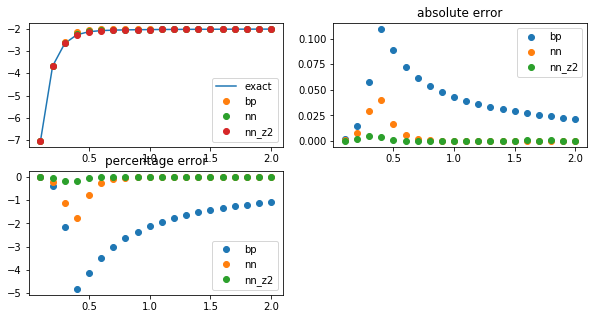

In [60]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2], init_=1)
#plt.ylim(-0.001,0.11)
plt.show()

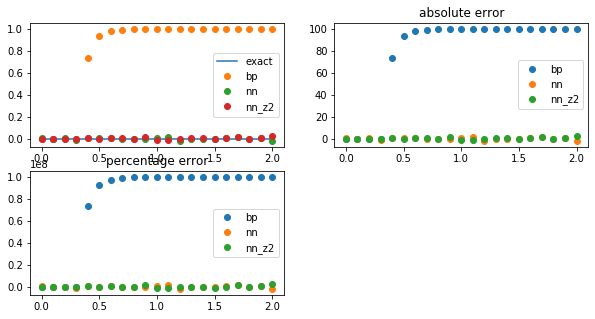

In [57]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

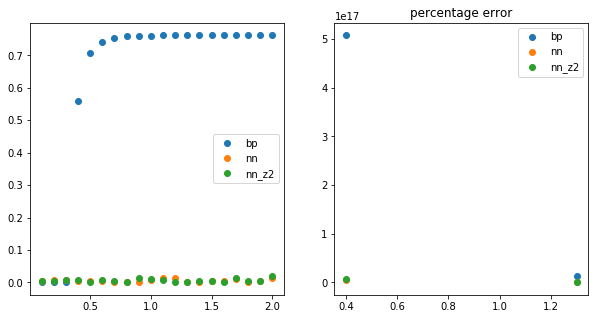

In [59]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_z2], init_=1)
plt.show()

# With random field

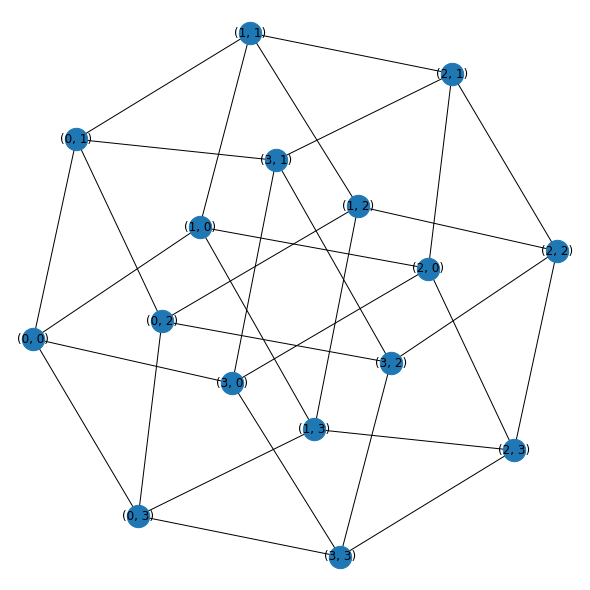

In [61]:
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

H_coeff = 6
H = H_coeff * np.random.random(N) - H_coeff
#H=np.zeros(N)

betas_fast = np.arange(1e-6,1.5,2e-1)

j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [62]:
import imp
imp.reload(solvers)
tree = model.model(N, H, J, J_interaction)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -1.57e-05 M: -3.24e-06 S: 0.693
beta: 0.2, Fe: -5.641 Energy: -4.25 M: -0.82 S: 0.2780.333
beta: 0.4, Fe: -5.260 Energy: -5.15 M: -0.983 S: 0.0427222
beta: 0.6, Fe: -5.242 Energy: -5.23 M: -0.998 S: 0.0076399
beta: 0.8, Fe: -5.240 Energy: -5.24 M: -1.0 S: 0.00151.888
beta: 1.0, Fe: -5.240 Energy: -5.24 M: -1.0 S: 0.000311888
beta: 1.2, Fe: -5.240 Energy: -5.24 M: -1.0 S: 6.43e-0588
beta: 1.4, Fe: -5.240 Energy: -5.24 M: -1.0 S: 1.33e-05888


In [14]:
res_nn = solvers.nn_sol(tree, betas_fast, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False, batch_size=10000,)
res_nn["name"]="nn"

fe: -693147.188 std_fe: 5.77E-02 M: 0.000 S: 0.693 E: 0.000M: -0.00713550
fe: -5.230 std_fe: 1.39E-02 M: -0.776 S: 0.324 E: -3.608 -0.764
fe: -4.761 std_fe: 7.35E-03 M: -0.976 S: 0.058 E: -4.617 -0.974
fe: -4.736 std_fe: 1.93E-03 M: -0.997 S: 0.010 E: -4.719 -0.998
fe: -4.734 std_fe: 6.71E-03 M: -0.999 S: 0.003 E: -4.730-1.099
fe: -4.733 std_fe: 7.41E-03 M: -1.000 S: 0.002 E: -4.7311.099
fe: -4.733 std_fe: 1.01E-02 M: -1.000 S: 0.001 E: -4.7321.099
fe: -4.733 std_fe: 1.57E-02 M: -1.000 S: 0.001 E: -4.732.0


In [15]:
res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: -0.000, iter 3
fe: -5.230, ener: -3.594, M: -0.773, iter 9
fe: -4.761, ener: -4.619, M: -0.976, iter 7
fe: -4.736, ener: -4.719, M: -0.997, iter 5
fe: -4.734, ener: -4.731, M: -1.000, iter 4
fe: -4.734, ener: -4.733, M: -1.000, iter 4
fe: -4.734, ener: -4.734, M: -1.000, iter 3
fe: -4.734, ener: -4.734, M: -1.000, iter 3


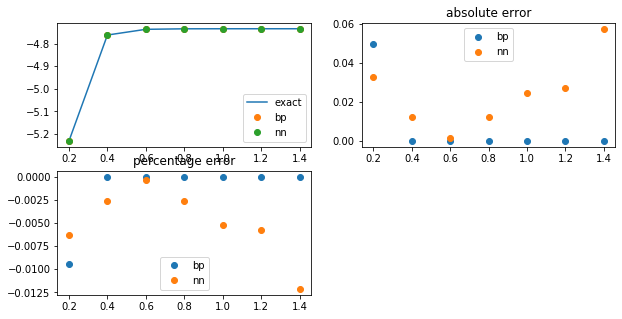

In [47]:
%matplotlib inline
label="fe"
import imp
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn], init_=1)
#plt.ylim(-0.001,0.11)
plt.show()

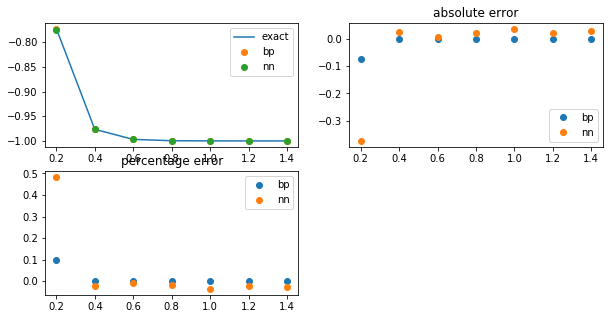

In [44]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn], init_=1)
plt.show()

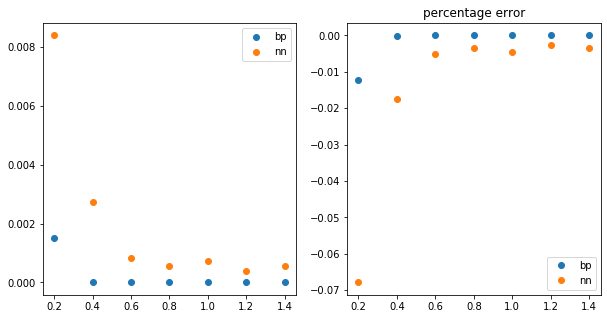

In [45]:
%matplotlib inline
label="M_i"
import imp
imp.reload(solvers)

plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn], init_=1)
plt.show()

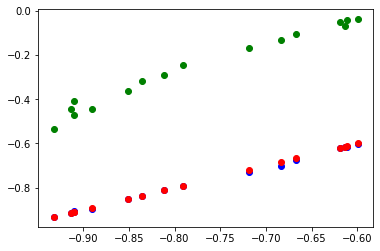

In [19]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][1], res_nn["M_i"][1], "bo")
plt.plot(res_ex["M_i"][1], res_bp["M_i"][1], "ro")
plt.plot(res_ex["M_i"][1], np.tanh(0.1*H), "go")


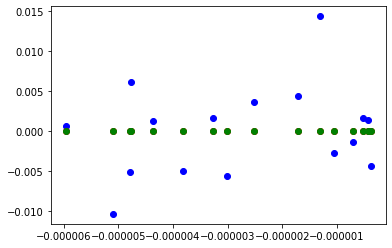

In [20]:
import matplotlib.pyplot as plt
plt.plot(res_ex["M_i"][0], res_nn["M_i"][0], "bo")
plt.plot(res_ex["M_i"][0], res_bp["M_i"][0], "ro")
plt.plot(res_ex["M_i"][0], np.tanh(1e-6*H), "go")
